In [1]:
import os

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [3]:
plt.rcParams["figure.figsize"] = [7.50, 5.50]
plt.rcParams["figure.autolayout"] = True

In [4]:
# CONSTANTS
OUTPUT_DIR = "output"
SUBSTANCE = "IPNOTICI E SEDATIVI"
SUBSTANCE_TEXT = SUBSTANCE.lower().capitalize()
YEAR = 2022

In [5]:
if not os.path.exists(OUTPUT_DIR):
    # Create the directory
    os.makedirs(OUTPUT_DIR)

# Utenti in carico secondo la sostanza d'abuso primaria - Ipnotici e sedativi (Anno 2022)

## Descrizione 

*"Il data-set contiene i dati relativi agli utenti in carico ai servizi pubblici per le dipendenze patologiche da sostanze nell'anno di riferimento.*

*Le informazioni contenute nel data-set sono elaborate in riferimento ai dati che le Regioni trasmettono al Ministero della salute, ai sensi del decreto del Ministro della salute 11 giugno 2010.*

*Per ciascun servizio sono riportati i dati relativi agli utenti per categoria di sostanza d'abuso."* (*fonte Ministero della Salute*)


[Link Dataset](https://www.dati.salute.gov.it/dati/dettaglioDataset.jsp?menu=dati&idPag=190) 



# prepare dataframe

In [6]:
df = pd.read_csv(
    '../datasets/C_17_dataset_190_0_upFile.csv',
    delimiter=";",
    skiprows=3,
    keep_default_na=False)

In [7]:
df.loc[df.Utenti == '']

,Anno,Codice regione,Descrizione Regione,Codice ASL,ASL,SERD,Categoria Sostanza,Utenti
40,2022,10,PIEMONTE,210,CN1,A01,OPPIACEI,
44,2022,10,PIEMONTE,210,CN1,S06,OPPIACEI,
62,2022,10,PIEMONTE,301,ASL CITTA' DI TORINO,A02,OPPIACEI,
97,2022,30,LOMBARDIA,706,ASST RHODENSE,S01,OPPIACEI,
277,2022,90,TOSCANA,201,AZIENDA USL TOSCANA CENTRO,S24,OPPIACEI,
...,...,...,...,...,...,...,...,...
2773,2022,200,SARDEGNA,201,AZIENDA PER LA TUTELA DELLA SALUTE,S05,ALTRE SOSTANZE,
2774,2022,200,SARDEGNA,201,AZIENDA PER LA TUTELA DELLA SALUTE,S06,ALTRE SOSTANZE,
2775,2022,200,SARDEGNA,201,AZIENDA PER LA TUTELA DELLA SALUTE,S12,ALTRE SOSTANZE,
2776,2022,200,SARDEGNA,201,AZIENDA PER LA TUTELA DELLA SALUTE,S14,ALTRE SOSTANZE,


In [8]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [9]:
df.loc[df.Utenti == '']

,Anno,Codice regione,Descrizione Regione,Codice ASL,ASL,SERD,Categoria Sostanza,Utenti


In [10]:
df.Utenti = df.Utenti.astype(float)

In [11]:
df["Categoria Sostanza"].unique()

array(['OPPIACEI', 'COCAINA', 'STIMOLANTI', 'IPNOTICI E SEDATIVI',
       'ALLUCINOGENI', 'INALANTI VOLATILI', 'CANNABINOIDI',
       'ALTRE DIPENDENZE', 'ALTRE SOSTANZE'], dtype=object)

In [12]:
df.loc[df["Descrizione Regione"] == 'PROV. AUTON. BOLZANO', "Descrizione Regione"] = 'trentino-alto adige'

In [13]:
df.loc[df["Descrizione Regione"] == 'PROV. AUTON. TRENTO', "Descrizione Regione"] = 'trentino-alto adige'

In [14]:
df['Descrizione Regione'] = df['Descrizione Regione'].str.lower()

In [15]:
df['Descrizione Regione'] = df['Descrizione Regione'].map(lambda x: x.replace("-", " "))

In [16]:
df = df.rename(columns={"Descrizione Regione": "reg_name"})

In [17]:
df = df.drop(columns=["ASL", "SERD", "Anno", "Codice ASL", "Codice regione"])

# Prepare geodataframe

In [18]:
if not os.path.exists("regions_df.pkl"):
    %run ../dataframes/regions_gdf.ipynb -i

In [19]:
regions_df = pd.read_pickle("regions_df.pkl")

In [20]:
regions_df

,reg_name,reg_istat_code_num,reg_istat_code,geometry,zone
0,piemonte,1,01,"POLYGON ((7.13605 45.27996, 7.13601 45.28040, ...",Nord
1,valle d'aosta,2,02,"POLYGON ((7.73455 45.92365, 7.73590 45.92744, ...",Nord
2,lombardia,3,03,"MULTIPOLYGON (((8.57964 45.75172, 8.57532 45.7...",Nord
3,trentino alto adige,4,04,"POLYGON ((12.01396 46.55091, 12.01376 46.55077...",Nord
4,veneto,5,05,"POLYGON ((10.63538 45.53543, 10.63228 45.56846...",Nord
5,friuli venezia giulia,6,06,"MULTIPOLYGON (((13.51691 46.38301, 13.51750 46...",Nord
6,liguria,7,07,"MULTIPOLYGON (((7.55166 43.89429, 7.56264 43.9...",Nord
7,emilia romagna,8,08,"MULTIPOLYGON (((9.33258 44.73504, 9.33167 44.7...",Centro
8,toscana,9,09,"MULTIPOLYGON (((9.89786 44.16359, 9.89451 44.1...",Centro
9,umbria,10,10,"MULTIPOLYGON (((13.15849 42.65425, 13.15764 42...",Centro


# Ipnotici e sedativi data 

In [21]:
df_substance = df.loc[df["Categoria Sostanza"] == SUBSTANCE ]

In [22]:
df_substance

,reg_name,Categoria Sostanza,Utenti
1460,piemonte,IPNOTICI E SEDATIVI,NaN
1461,piemonte,IPNOTICI E SEDATIVI,NaN
1462,piemonte,IPNOTICI E SEDATIVI,1.0
1463,piemonte,IPNOTICI E SEDATIVI,1.0
1464,piemonte,IPNOTICI E SEDATIVI,1.0
...,...,...,...
1778,sardegna,IPNOTICI E SEDATIVI,1.0
1779,sardegna,IPNOTICI E SEDATIVI,1.0
1780,sardegna,IPNOTICI E SEDATIVI,4.0
1781,sardegna,IPNOTICI E SEDATIVI,3.0


In [23]:
df_substance["Categoria Sostanza"].unique()

array(['IPNOTICI E SEDATIVI'], dtype=object)

In [24]:
df_substance = df_substance.drop(columns=["Categoria Sostanza", ])

In [ ]:
if not os.path.exists("serd_regions_count.pkl"):
    %run ../dataframes/serd.ipynb -i

In [25]:
serd_regions_count = df.groupby([
    'reg_name',
]).count().reset_index()

In [26]:
serd_regions_count

,reg_name,Utenti
0,abruzzo,3
1,basilicata,2
2,calabria,1
3,campania,13
4,emilia romagna,34
5,friuli venezia giulia,5
6,lazio,31
7,liguria,13
8,lombardia,34
9,marche,14


In [27]:
serd_regions_count = serd_regions_count.rename(columns={"Utenti": "serd_count"})

In [28]:
df_substance = df_substance.groupby([
    'reg_name',
]).sum().reset_index()

In [29]:
df_substance = df_substance.rename(columns={"Utenti": "utenti_sum"})

In [30]:
df_substance = df_substance.merge(df_substance_agg_serd, on="reg_name")

In [31]:
df_substance["utenti_std"] = df_substance["utenti_sum"] / df_substance["serd_count"]

In [32]:
df_substance

,reg_name,utenti_sum,serd_count,utenti_std
0,abruzzo,4.0,3,1.333333
1,basilicata,2.0,2,1.000000
2,calabria,2.0,1,2.000000
3,campania,16.0,13,1.230769
4,emilia romagna,106.0,34,3.117647
5,friuli venezia giulia,11.0,5,2.200000
6,lazio,81.0,31,2.612903
7,liguria,22.0,13,1.692308
8,lombardia,76.0,34,2.235294
9,marche,31.0,14,2.214286


In [33]:
gdf_substance = regions_df.merge(df_substance)

In [34]:
gdf_substance

,reg_name,reg_istat_code_num,reg_istat_code,geometry,zone,utenti_sum,serd_count,utenti_std
0,piemonte,1,01,"POLYGON ((7.13605 45.27996, 7.13601 45.28040, ...",Nord,78.0,38,2.052632
1,valle d'aosta,2,02,"POLYGON ((7.73455 45.92365, 7.73590 45.92744, ...",Nord,1.0,1,1.000000
2,lombardia,3,03,"MULTIPOLYGON (((8.57964 45.75172, 8.57532 45.7...",Nord,76.0,34,2.235294
3,trentino alto adige,4,04,"POLYGON ((12.01396 46.55091, 12.01376 46.55077...",Nord,21.0,3,7.000000
4,veneto,5,05,"POLYGON ((10.63538 45.53543, 10.63228 45.56846...",Nord,109.0,23,4.739130
5,friuli venezia giulia,6,06,"MULTIPOLYGON (((13.51691 46.38301, 13.51750 46...",Nord,11.0,5,2.200000
6,liguria,7,07,"MULTIPOLYGON (((7.55166 43.89429, 7.56264 43.9...",Nord,22.0,13,1.692308
7,emilia romagna,8,08,"MULTIPOLYGON (((9.33258 44.73504, 9.33167 44.7...",Centro,106.0,34,3.117647
8,toscana,9,09,"MULTIPOLYGON (((9.89786 44.16359, 9.89451 44.1...",Centro,32.0,19,1.684211
9,umbria,10,10,"MULTIPOLYGON (((13.15849 42.65425, 13.15764 42...",Centro,15.0,6,2.500000


In [35]:
gdf_substance_agg = gdf_substance[["reg_name", 'utenti_sum', 'zone', 'serd_count']].groupby("reg_name").sum()

In [36]:
region_colours = {
    "Nord": "#2a9d8f", 
    "Centro": "#e76f51",
    "Sud e Isole": "#e9c46a",
}

In [37]:
plot_title = "Totale Utilizzatori di {} per SerD per regione - Anno {}".format(
    SUBSTANCE_TEXT,
    YEAR
)

Text(260, -30, 'fonte: Ministero della salute')

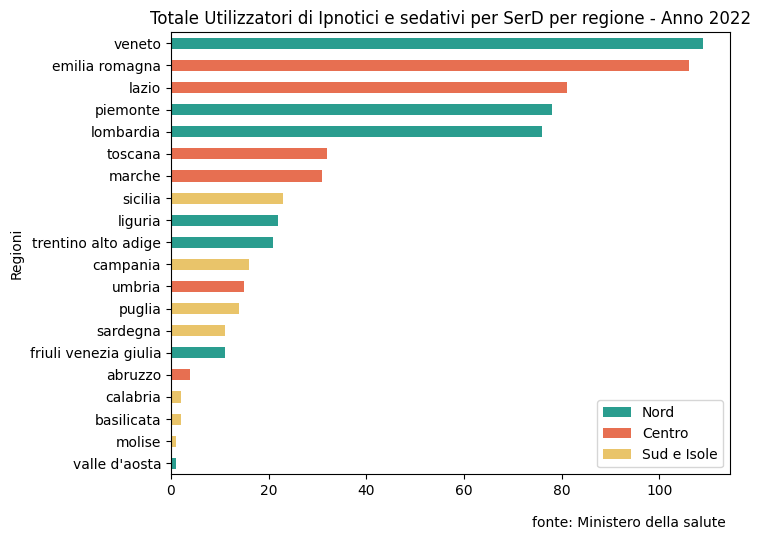

In [38]:
gdf_substance_agg_barplot = gdf_substance_agg.sort_values(by=['utenti_sum']).plot.barh(
    y="utenti_sum",
    ylabel='Regioni',
    title=plot_title,
    color=gdf_substance_agg.sort_values(by=['utenti_sum'])['zone'].replace(region_colours)
).legend(
    [
        Patch(facecolor=region_colours['Nord']),
        Patch(facecolor=region_colours['Centro']),
        Patch(facecolor=region_colours['Sud e Isole']),
    ], ["Nord", "Centro", 'Sud e Isole']
)
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')

In [39]:
gdf_substance_agg_barplot.get_figure().savefig('output/gdf_substance_agg_barplot.png')

Text(260, -30, 'fonte: Ministero della salute')

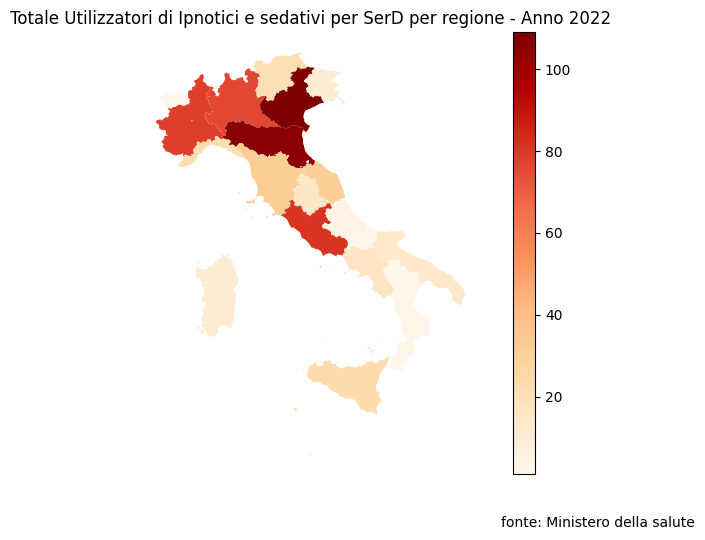

In [40]:
plot_substance = gdf_substance.plot(
    column="utenti_sum",
    legend=True,
    cmap='OrRd'
);
plt.title(plot_title)
plot_substance.set_axis_off()
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')

In [41]:
plot_substance.get_figure().savefig('output/plot_substance.png')

In [42]:
gdf_substance_agg_avg = gdf_substance[["reg_name", 'utenti_std', 'zone']].groupby("reg_name").sum()

In [43]:
gdf_substance_agg_avg.sort_values(by=['utenti_std'])['zone']

reg_name
basilicata               Sud e Isole
valle d'aosta                   Nord
molise                   Sud e Isole
puglia                   Sud e Isole
campania                 Sud e Isole
abruzzo                       Centro
toscana                       Centro
liguria                         Nord
sardegna                 Sud e Isole
calabria                 Sud e Isole
piemonte                        Nord
sicilia                  Sud e Isole
friuli venezia giulia           Nord
marche                        Centro
lombardia                       Nord
umbria                        Centro
lazio                         Centro
emilia romagna                Centro
veneto                          Nord
trentino alto adige             Nord
Name: zone, dtype: object

In [44]:
plot_title = "Media Utilizzatori di {} per SerD per regione - Anno {}".format(
    SUBSTANCE_TEXT,
    YEAR
)

Text(260, -30, 'fonte: Ministero della salute')

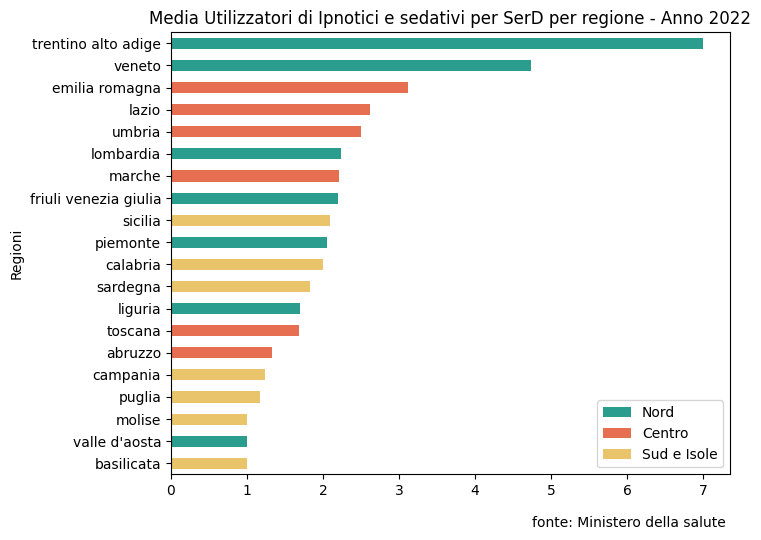

In [45]:
gdf_substance_agg_avg_barplot = gdf_substance_agg_avg.sort_values(by=['utenti_std']).plot.barh(
    y="utenti_std",
    ylabel='Regioni',
    title=plot_title,
    color=gdf_substance_agg_avg.sort_values(by=['utenti_std'])['zone'].replace(region_colours)
).legend(
    [
        Patch(facecolor=region_colours['Nord']),
        Patch(facecolor=region_colours['Centro']),
        Patch(facecolor=region_colours['Sud e Isole']),
    ], ["Nord", "Centro", 'Sud e Isole']
)
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')

In [46]:
gdf_substance_agg_avg_barplot.get_figure().savefig('output/gdf_substance_agg_avg_barplot.png')

In [47]:
plot_title = "Media Utilizzatori di {} per SerD per regione - Anno {}".format(
    SUBSTANCE_TEXT,
    YEAR
)

Text(260, -30, 'fonte: Ministero della salute')

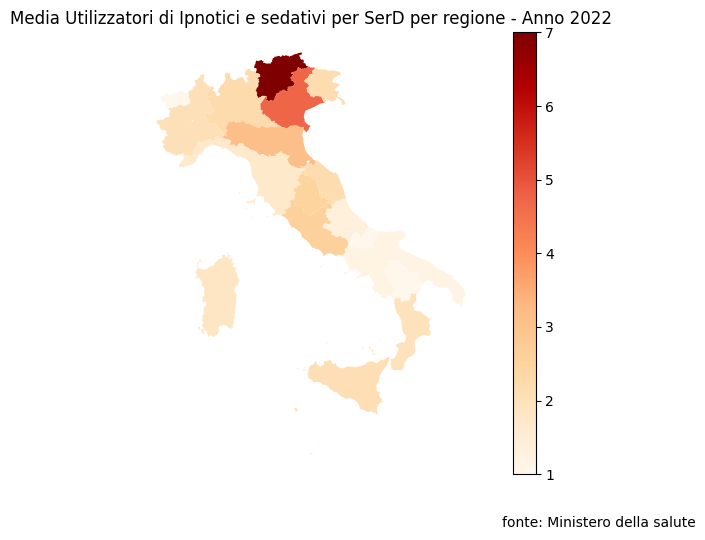

In [48]:
plot_substance_avg = gdf_substance.plot(
    column="utenti_std",
    legend=True,
    cmap='OrRd'
)
plt.title(plot_title)
plot_substance_avg.set_axis_off()
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')

In [49]:
plot_substance_avg.get_figure().savefig('output/plot_substance_avg.png')

In [50]:
plot_title = "Totale SerD per regione - Anno {}".format(
    YEAR
)

Text(260, -30, 'fonte: Ministero della salute')

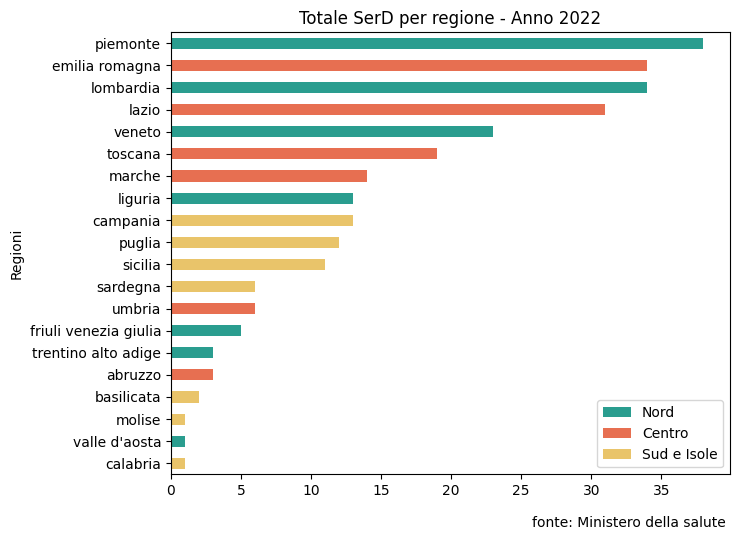

In [51]:
gdf_serd_agg_barplot = gdf_substance_agg.sort_values(by=['serd_count']).plot.barh(
    y="serd_count",
    ylabel='Regioni',
    title=plot_title,
    color=gdf_substance_agg.sort_values(by=['serd_count'])['zone'].replace(region_colours)
).legend(
    [
        Patch(facecolor=region_colours['Nord']),
        Patch(facecolor=region_colours['Centro']),
        Patch(facecolor=region_colours['Sud e Isole']),
    ], ["Nord", "Centro", 'Sud e Isole']
)
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')

In [52]:
gdf_serd_agg_barplot.get_figure().savefig('output/gdf_serd_agg_barplot.png')

Text(260, -30, 'fonte: Ministero della salute')

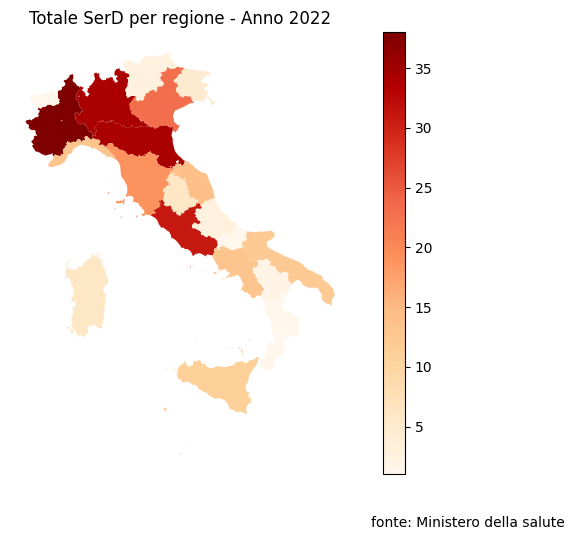

In [53]:
plot_serd = gdf_substance.plot(
    column="serd_count",
    legend=True,
    cmap='OrRd'
)
plt.title(plot_title)
plot_serd.set_axis_off()
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')

In [54]:
plot_serd.get_figure().savefig('output/plot_serd.png')